# Lockdown intensity through public bikes mobility data

With this analysis I would like to gain insights on the intensity of the lockdown in April at Oslo, through data on the use of public bikes. In general, the harder the lockdown, the fewer the people travelling. Therefore we should be able to assess how strong the restrictions are, and how closely people are following them, by looking at mobility data.

In this analysis we are going to look at data about the use of the public shared bikes provided by the city of Oslo. We will start from a very simple analysis: by counting the number of rides and the total time travelled.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

df_19 = pd.read_csv('04-2019.csv',parse_dates=[0,1],index_col='started_at')
df_20 = pd.read_csv('04-2020.csv',parse_dates=[0,1],index_col='started_at')
df_19.head()

,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
started_at,,,,,,,,,,,,
2019-04-02 22:18:47.926000+00:00,2019-04-02 22:24:25.427000+00:00,337,401,Schous plass,nærmest Thorvald Meyers gate,"59,920259","10,760629",381,Grønlands torg,ved Tøyenbekken,"59,91252","10,76224"
2019-04-02 22:25:54.203000+00:00,2019-04-02 22:27:36.114000+00:00,101,556,Pilestredet,ved Sporveisgata,"59,9262242","10,7296246",556,Pilestredet,ved Sporveisgata,"59,9262242","10,7296246"
2019-04-02 22:26:39.308000+00:00,2019-04-02 22:31:59.445000+00:00,320,561,Kirkeveien,nord for Gørbitz' gate,"59,9335582","10,7264261",471,Marienlyst,i Suhms gate,"59,932454","10,721769"
2019-04-03 03:09:58.992000+00:00,2019-04-03 03:12:00.589000+00:00,121,393,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,"59,939244","10,774319",393,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,"59,939244","10,774319"
2019-04-03 03:10:02.415000+00:00,2019-04-03 03:14:44.537000+00:00,282,597,Fredensborg,ved rundkjøringen,"59,920995","10,750358",557,Akersgata,ved Grensen,"59,9141971","10,7428828"


In [2]:
df_19.columns

Index(['ended_at', 'duration', 'start_station_id', 'start_station_name',
       'start_station_description', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_description', 'end_station_latitude',
       'end_station_longitude'],
      dtype='object')

In [3]:
rows_2019,cols_2019 = df_19.shape
rows_2020,cols_2020 = df_20.shape
total_rides_variation = (rows_2020 - rows_2019) / rows_2019
total_rides_variation

-0.5019154649934454

Compared to 2019, there have been 50.19% fewer rides in 2020.

In [4]:
#Durations are in seconds
df_19['duration']

started_at
2019-04-02 22:18:47.926000+00:00     337
2019-04-02 22:25:54.203000+00:00     101
2019-04-02 22:26:39.308000+00:00     320
2019-04-03 03:09:58.992000+00:00     121
2019-04-03 03:10:02.415000+00:00     282
2019-04-03 03:16:21.557000+00:00     658
2019-04-03 03:39:11.948000+00:00     214
2019-04-03 03:43:38.513000+00:00     384
2019-04-03 03:46:23.126000+00:00     857
2019-04-03 03:50:36.147000+00:00     339
2019-04-03 03:52:34.761000+00:00    6683
2019-04-03 04:02:52.339000+00:00    1004
2019-04-03 04:04:25.176000+00:00     546
2019-04-03 04:04:46.021000+00:00     608
2019-04-03 04:05:32.401000+00:00     391
2019-04-03 04:06:05.683000+00:00    1028
2019-04-03 04:07:39.612000+00:00     872
2019-04-03 04:08:48.939000+00:00     217
2019-04-03 04:09:28.547000+00:00     593
2019-04-03 04:10:12.013000+00:00     224
2019-04-03 04:11:53.553000+00:00     246
2019-04-03 04:12:15.037000+00:00     405
2019-04-03 04:12:37.770000+00:00     284
2019-04-03 04:17:35.314000+00:00     565
2019-

In [5]:
total_duration_2019 = df_19['duration'].sum()
total_duration_2020 = df_20['duration'].sum()
total_duration_variation = (total_duration_2020 - total_duration_2019) / total_duration_2019
total_duration_variation

-0.45972917064790036

Compared to 2019, the total time travelled has shrinked by 45.97%.

In [6]:
df_19['duration'].describe()

count    2.357130e+05
mean     8.875432e+02
std      6.237237e+03
min      6.100000e+01
25%      3.300000e+02
50%      5.310000e+02
75%      8.890000e+02
max      1.135407e+06
Name: duration, dtype: float64

In [7]:
df_20['duration'].describe()

count    117405.000000
mean        962.715464
std        1283.649437
min          61.000000
25%         384.000000
50%         637.000000
75%        1107.000000
max      183081.000000
Name: duration, dtype: float64

From the description of the rides durations, we can see that actually that the average time travelled per ride has increased in 2020. Therefore the decrease in total time travelled is caused exclusively by the fewer total rides.

In [8]:
df_19_counts = df_19.resample('D').count()
df_20_counts = df_20.resample('D').count()
df_19_counts.index = df_19_counts.index.shift(periods=365)
df_19_counts['year'] = '2019'
df_20_counts['year'] = '2020'
df_counts = pd.concat([df_19_counts,df_20_counts],sort=True)

/home/alle/.local/lib/python3.5/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/home/alle/.local/lib/python3.5/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


Text(0.5, 1.0, 'Total bike rides per month day in April')

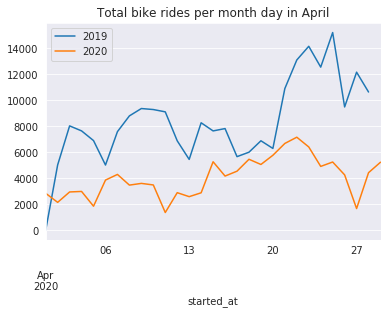

In [9]:
df_19_counts.iloc[:,0].plot()
df_20_counts.iloc[:,0].plot()
plt.legend(['2019','2020'])
plt.title('Total bike rides per month day in April')

If we plot alongside the 2019 and 2020 data, we can see that almost every day of the month there have been fewer rides in 2020. In particular, the gap narrows towards the 20th of April, and then widens again. This may coincide with naive considerations, because the week 12-19 was Easter week in 2020. At the eye test we had the impression that people were going out more than in the past weeks.

However, this study is not conclusive: before drawing conclusions we should account for the weather and for the day of the week.

In [10]:
df_variations = (df_20_counts.iloc[:,0] - df_19_counts.iloc[:,0]) / df_19_counts.iloc[:,0]
df_variations.head()

started_at
2020-04-01 00:00:00+00:00    946.000000
2020-04-02 00:00:00+00:00     -0.572964
2020-04-03 00:00:00+00:00     -0.633101
2020-04-04 00:00:00+00:00     -0.609373
2020-04-05 00:00:00+00:00     -0.731902
Freq: D, Name: ended_at, dtype: float64

/home/alle/.local/lib/python3.5/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


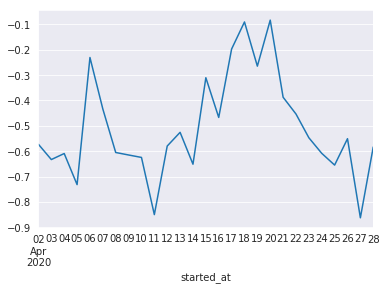

In [11]:
df_variations.iloc[1:-1].plot(kind='line')

As we saw in the previous chart, the relative variation compared to 2019 has been slimmer around the 20th of April, and near the end of the month got back to levels similar to the week 5-12.

This brief study is able to tell detect a spike in mobility in the period 12th-19th of April, which was Easter week in 2020. This surely denote the fact that in those days the situation was similar to 2019, so it may hint at an ease of the lockdown, or at a less strict following of the lockdown rules by the population. Even with simple mobility data, we can see a clear increase in mobility to levels similar to 2019.

This is not conclusive on the _reasons_ though. We would be able to say more about this by plugging in weather data, the day of the week and the days when restrictions were lifted.

### Variation by day of the week

In [12]:
df = pd.concat([df_19,df_20])
mask_weekday = np.where(df.index.weekday < 5,"Weekday","Weekend")
df_year_weekday = df.groupby([df.index.year,mask_weekday])
df_year_weekday.count()

ended_at  duration  start_station_id  start_station_name  \
started_at                                                                     
2019       Weekday    176680    176680            176680              176680   
           Weekend     59033     59033             59033               59033   
2020       Weekday     88302     88302             88302               88302   
           Weekend     29103     29103             29103               29103   

                    start_station_description  start_station_latitude  \
started_at                                                              
2019       Weekday                     176680                  176680   
           Weekend                      59033                   59033   
2020       Weekday                      88302                   88302   
           Weekend                      29103                   29103   

                    start_station_longitude  end_station_id  end_station_name  \
started_at                                                                      
2019       Weekday                   176680          176680            176680   
           Weekend                    59033           59033             59033   
2020       Weekday                    88302           88302             88302   
           Weekend                    29103           29103             29103   

                    end_station_description  end_station_latitude  \
started_at                                                          
2019       Weekday                   176680                176680   
           Weekend                    59033                 59033   
2020       Weekday                    88302                 88302   
           Weekend                    29103                 29103   

                    end_station_longitude  
started_at                                 
2019       Weekday                 176680  
           Weekend                  59033  
2020       Weekday                  88302  
           Weekend                  29103

(-0.5, 0.15)

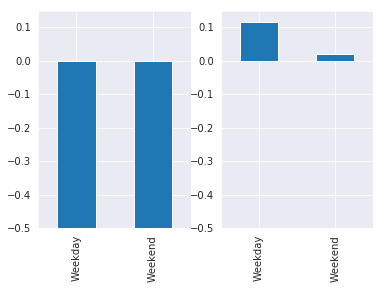

In [13]:
variarion_by_weekday = (df_year_weekday.count().loc[2020,'ended_at'] / df_year_weekday.count().loc[2019,'ended_at']) - 1
variarion_by_weekday2 = (df_year_weekday.mean().loc[2020,'duration'] / df_year_weekday.mean().loc[2019,'duration']) - 1
plt.subplot(121)
variarion_by_weekday.plot(kind='bar')
plt.ylim(-0.5,0.15)
plt.subplot(122)
variarion_by_weekday2.plot(kind='bar')
plt.ylim(-0.5,0.15)

The variation in the number rides is the same regardless of whether the considered day is a weekday or a weekend. As we saw, the average variation of a ride has increased, and it increased more in the weekdays.

### Variation by week

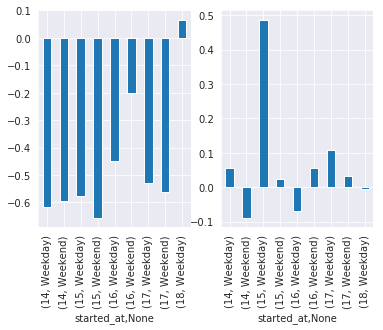

In [14]:
df_by_week = df.groupby([df.index.year,df.index.week,mask_weekday])
variarion_by_week = (df_by_week.count().loc[2020,'ended_at'] / df_by_week.count().loc[2019,'ended_at']) -1
variarion_by_week2 = (df_by_week.mean().loc[2020,'duration'] / df_by_week.mean().loc[2019,'duration']) - 1
plt.subplot(121)
variarion_by_week.plot(kind='bar')
plt.subplot(122)
variarion_by_week2.plot(kind='bar')

The decrease in the number of rides per week is almost constant except for two weeks. In particular, in the weekend of the 16th week people in Oslo seem to have picked up the public bikes again. As for the ride duration, in the 15th week there is a great spike in the variation! These two things are worth investigating. The standard suspects are public holidays and weather.

In [15]:
df[df.index.week==15]

,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
started_at,,,,,,,,,,,,
2019-04-08 03:00:04.569000+00:00,2019-04-08 03:07:08.793000+00:00,424,473,Majorstuveien,i Maries gate,"59,926697","10,716195",572,Skøyen,under broen,"59,922247","10,679738"
2019-04-08 03:00:56.178000+00:00,2019-04-08 03:11:29.629000+00:00,633,526,Lille Grensen,Ved Akersgata,"59,9138973","10,7423101",446,Bislett Stadion,ved rundkjøringen,"59,92549","10,731288"
2019-04-08 03:08:57.599000+00:00,2019-04-08 03:14:07.906000+00:00,310,464,Sukkerbiten,ved gangbroen til Sørenga,"59,905037","10,753698",574,Annette Thommessens Plass,langs Schweigaards gate,"59,9107393","10,7609998"
2019-04-08 03:11:04.306000+00:00,2019-04-08 03:15:33.005000+00:00,268,734,Nylandsveien,mellom Norbygata og Urtegata,"59,9156603","10,7622812",478,Jernbanetorget,på Europarådets plass,"59,911901","10,749929"
2019-04-08 03:18:54.700000+00:00,2019-04-08 03:21:02.409000+00:00,127,446,Bislett Stadion,ved rundkjøringen,"59,92549","10,731288",403,Parkveien,utenfor Katedralen pub,"59,921768","10,730476"
2019-04-08 03:27:18.956000+00:00,2019-04-08 03:34:25.880000+00:00,426,499,Bjerregaards gate,ovenfor Fredrikke Qvams gate,"59,925488","10,746058",557,Akersgata,ved Grensen,"59,9141971","10,7428828"
2019-04-08 03:28:30.265000+00:00,2019-04-08 03:32:54.406000+00:00,264,444,AHO,langs Maridalsveien,"59,925265","10,750462",384,Vår Frelsers gravlund sør,langs Ullevålsveien,"59,919463","10,743829"
2019-04-08 03:29:24.311000+00:00,2019-04-08 03:38:05.577000+00:00,521,593,Bjølsen mølle,i Sandakerveien,"59,9392","10,768774",478,Jernbanetorget,på Europarådets plass,"59,911901","10,749929"
2019-04-08 03:31:38.054000+00:00,2019-04-08 03:44:21.243000+00:00,763,525,Myraløkka Øst,langs Bentsenbrugata,"59,937205","10,7605813",558,Dokkveien,ved Støperigata,"59,910974","10,7277001"


The week ending in the 12th of April 2020 was indeed the week leading up to Easter. This was not the case in 2019, where Easter was the 21st of April. This explains the smaller decrease in the rides taken in that weekend---it was Easter weekend in 2020.

### Variation in the hourly trend during the day

In [16]:
df_by_hour = df.groupby([df.index.year,mask_weekday,df.index.hour]).count()
df_by_hour

ended_at  duration  start_station_id  \
started_at         started_at                                         
2019       Weekday 0                  1         1                 1   
                   3                623       623               623   
                   4               3843      3843              3843   
                   5              11117     11117             11117   
                   6              13388     13388             13388   
                   7               6623      6623              6623   
                   8               4878      4878              4878   
                   9               5994      5994              5994   
                   10              7047      7047              7047   
                   11              8366      8366              8366   
                   12             10608     10608             10608   
                   13             13994     13994             13994   
                   14             19011     19011             19011   
                   15             17147     17147             17147   
                   16             14338     14338             14338   
                   17             11821     11821             11821   
                   18              9910      9910              9910   
                   19              7058      7058              7058   
                   20              5572      5572              5572   
                   21              3987      3987              3987   
                   22              1347      1347              1347   
                   23                 7         7                 7   
           Weekend 0                  8         8                 8   
                   1                  4         4                 4   
                   3                142       142               142   
                   4                286       286               286   
                   5                561       561               561   
                   6                844       844               844   
                   7               1596      1596              1596   
                   8               2152      2152              2152   
...                                 ...       ...               ...   
2020       Weekday 15              9220      9220              9220   
                   16              7444      7444              7444   
                   17              5849      5849              5849   
                   18              4322      4322              4322   
                   19              3154      3154              3154   
                   20              2313      2313              2313   
                   21              1307      1307              1307   
                   22               666       666               666   
                   23                 3         3                 3   
           Weekend 3                 36        36                36   
                   4                121       121               121   
                   5                333       333               333   
                   6                334       334               334   
                   7                592       592               592   
                   8               1023      1023              1023   
                   9               1735      1735              1735   
                   10              2376      2376              2376   
                   11              2747      2747              2747   
                   12              3262      3262              3262   
                   13              3319      3319              3319   
                   14              2952      2952              2952   
                   15              2589      2589              2589   
                   16              2209      2209              2209   
                   17              1731      1731      

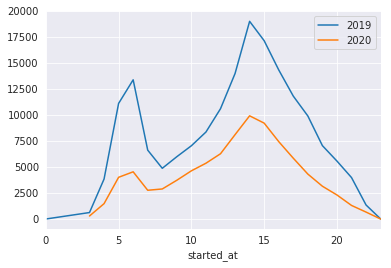

In [17]:
df_by_hour.loc[(2019,'Weekday'),'ended_at'].plot()
df_by_hour.loc[(2020,'Weekday'),'ended_at'].plot()
plt.legend(['2019','2020'])

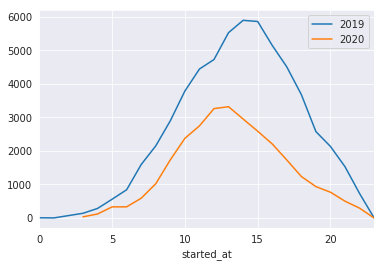

In [18]:
df_by_hour.loc[(2019,'Weekend'),'ended_at'].plot()
df_by_hour.loc[(2020,'Weekend'),'ended_at'].plot()
plt.legend(['2019','2020'])